# Generate land sea mask

This notebook provides a method to generate a landmask for lat-lon grid using the PMP's [create_target_grid](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.create_target_grid.html) and [create_land_sea_mask](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.create_land_sea_mask.html#pcmdi_metrics.utils.create_land_sea_mask) functions.

Jiwoo Lee (LLNL), 2025-1-15

In [1]:
from pcmdi_metrics.utils import create_target_grid
from pcmdi_metrics.utils import create_land_sea_mask

## Generate your grid

Define your resolution in degree.

In [2]:
#resolution = '2.5x2.5'
resolution = '1x1'
#resolution = '0.5x0.5'

In [3]:
grid = create_target_grid(target_grid_resolution=resolution)

In [4]:
grid

<xarray.Dataset> Size: 13kB
Dimensions:   (lon: 360, bnds: 2, lat: 180)
Coordinates:
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 6kB 0.0 1.0 1.0 2.0 ... 359.0 359.0 360.0
    lat_bnds  (lat, bnds) float64 3kB -90.0 -89.0 -89.0 -88.0 ... 89.0 89.0 90.0

## Generate land sea mask for the grid

In [5]:
mask = create_land_sea_mask(grid)

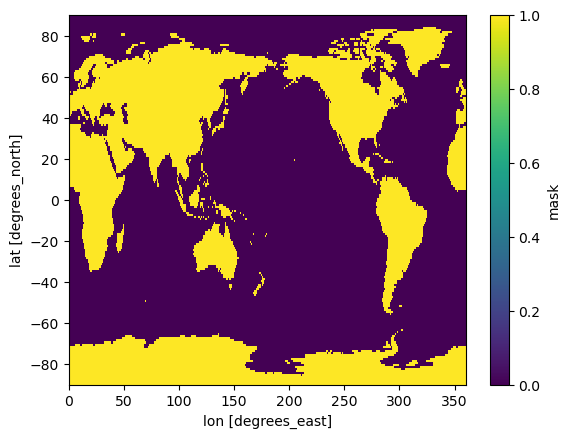

In [6]:
mask.plot()

### _Optional_: Apply different landsea mask generation method

This option uses the PCMDI method developed by Taylor and Doutriaux (2000) (https://pcmdi.llnl.gov/report/ab58.html)

In [7]:
mask2 = create_land_sea_mask(grid, method="pcmdi")

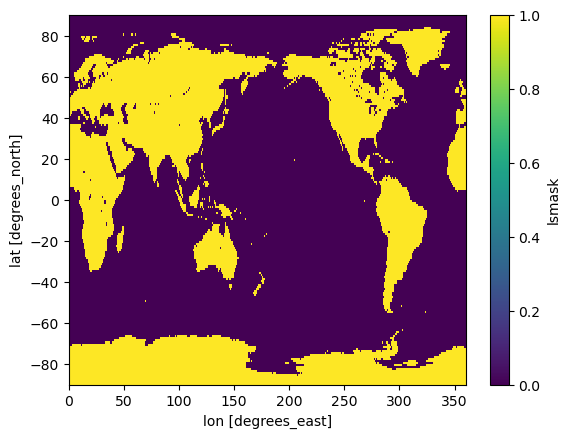

In [8]:
mask2.plot()

### Save to a netCDF file

In [9]:
ncfile = f"landmask_{resolution}_regionmask.nc"
ncfile2 = f"landmask_{resolution}_pcmdi.nc"

mask.to_netcdf(ncfile)
mask2.to_netcdf(ncfile2)

### Quick check for the saved file

In [10]:
import xarray as xr
ds = xr.open_dataset(ncfile)

In [11]:
ds

<xarray.Dataset> Size: 523kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    mask     (lat, lon) int64 518kB ...

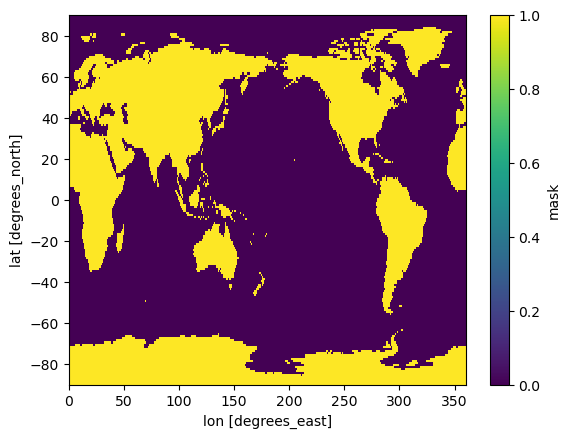

In [12]:
ds["mask"].plot()